## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

Можно убрать нечетные степени $x$, так как интегрирование происходит по симметричному отрезку:


$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx = \int_{-1}^1 (- 8 x^2 + 3) dx = \left. -8 \cdot \frac{x^{3}}{3} + 3 \cdot x \right|_{-1}^{ 1} = -8 \cdot \frac{2}{3} + 3 \cdot 2 = \frac{2}{3}
$$



2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [1]:
import numpy as np

def midpoint_rule(func, a, b, eps):
    n = 10
    x = np.linspace(a, b, n+1)
    I1 = (b - a) / n * sum(func((x[1:] + x[:n]) / 2)) 
    n *= 2
    x = np.linspace(a, b, n+1)
    I2 = (b - a) / n * sum(func((x[1:] + x[:n]) / 2)) 
    while abs((I2 - I1) / I1) > eps:
        n *= 2
        x = np.linspace(a, b, n+1)
        I1 = I2
        I2 = (b - a) / n * sum(func((x[1:] + x[:n]) / 2)) 
    return I2, n

f1 = lambda x: 7 * x**3 - 8 * x**2 - 3 * x + 3
print('Значение интеграла: {}\nКоличество узлов: {}'.format(*midpoint_rule(f1, -1, 1, 1e-10)))

Значение интеграла: 0.6666666666790633
Количество узлов: 655360


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [2]:
from scipy.special import roots_legendre

for n in range(1, 7):
    x, w = roots_legendre(n)
    print('n = {}\nЗначение интеграла: {}\n'.format(n, sum(w * f1(x))))

n = 1
Значение интеграла: 6.0

n = 2
Значение интеграла: 0.6666666666666674

n = 3
Значение интеграла: 0.6666666666666639

n = 4
Значение интеграла: 0.6666666666666667

n = 5
Значение интеграла: 0.6666666666666685

n = 6
Значение интеграла: 0.6666666666666695



Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

Видно, что для получения относительной точности интеграла $10^{-10}$ в случае равномерной сетки нужно ооочень много узлов. В случае полиномов Лежандра достаточно уже 2 точек, чтобы добиться необходимого количества верных знаков, что говорит об очень высокой точности этого метода вычисления интегралов

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

Сначала посчитаем интеграл:

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = \left. \frac{7 x^4}{4} - \frac{8 x^3}{3} - \frac{3 x^2}{2} + 3 x \right|_{0}^{10} = 17500 - \frac{8000}{3} - 150 + 30 = 14713.(3)
$$



Теперь сделаем замену $y = 0.2x - 1$. Тогда отрезок интегрирования перейдёт в нужный нам интервал. С новой переменной интеграл будет выглядеть так:

$$
\int_{-1}^{1} \big( 7 \cdot 125 (y + 1)^{3} - 8 \cdot 25 (y + 1)^{2} - 3 \cdot 5(y + 1) + 3 \big) \cdot 5dy
$$

In [3]:
n = 3
x, w = roots_legendre(n)
f2 = lambda y: 5 * f1(5 * y + 5)
print(sum(w * f2(x)))

14713.333333333332


Сравните результат с точным значением интеграла.

Получили, что даже трёх точек достаточно, чтобы получить значение интеграла с точностью, сравнимой с точностью вычислений компьютера

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Для этого интеграла нужно взять весовую функцию $\omega(x) = \frac{1}{\sqrt{1 - x^2}}$. Ей соответствуют полиномы Чебышёва, которые определены на отрезке $[-1; 1]$. Чтобы подогнать наш интеграл под эти полиномы, сначала заметим, что у нас интегрируется четная функция. То есть первоначальный интеграл можно переписать так:

$$
I = \frac{1}{2} \int_{-2\pi}^{2\pi} \frac{\cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \frac{1}{2} \int_{-2\pi}^{2\pi} \frac{\cos(x) d\big(\frac{x}{2\pi}\big) }{\sqrt{1 - \big(\frac{x}{2\pi}\big)^2}}
$$

Теперь сделаем замену $y = \frac{x}{2\pi}$. Тогда интеграл принимает необходимый нам вид:

$$
I = \frac{1}{2} \int_{-1}^{1} \frac{\cos(2\pi y) dy }{\sqrt{1 - y^2}}
$$



In [4]:
from scipy.special import roots_chebyt

f3 = lambda y: np.cos(2 * np.pi * y)
x, w = roots_chebyt(1)
I1 = 0.5 * sum(w * f3(x))
x, w = roots_chebyt(2)
I2 = 0.5 * sum(w * f3(x))
n = 2
while abs((I2 - I1) / I1) > 1e-16:
    n += 1
    I1 = I2
    x, w = roots_chebyt(n)
    I2 = 0.5 * sum(w * f3(x))
print('Значение интеграла: {}\nКоличество узлов: {}'.format(I2, n))

Значение интеграла: 0.3460101588122643
Количество узлов: 31


## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

В нашем случае последнее выражение из теоретической части принимает следующий вид:

$$
\sum_j \Big( \frac{1}{2} w_j \, f_j - \delta_{ij}f_i \Big) = \sum_j \Big( \frac{1}{2} w_j - \delta_{ij} \Big) f_j = -\sin(\pi x_i)
$$

Последнее запишем в матричном виде:

$$
\big( \frac{1}{2} \Omega - E \big) \vec{f} = -\sin(\pi \vec{x})
$$

Здесь $\Omega$ - матрица, $k$-ый столбец которой состоит из $\omega_k$, $\vec{f}$ - вектор из значений $f_k$, а $\vec{x}$ - вектор из узлов сетки $x_k$

In [5]:
from scipy.special import roots_sh_legendre


def build_func(n):
    x, w = roots_sh_legendre(n)
    omega = np.ones((n, n))
    for i in range(n):
        omega[i,:] *= w
    return x, np.linalg.solve(0.5 * omega - np.eye(n), -np.sin(x * np.pi))

<IPython.core.display.Javascript object>


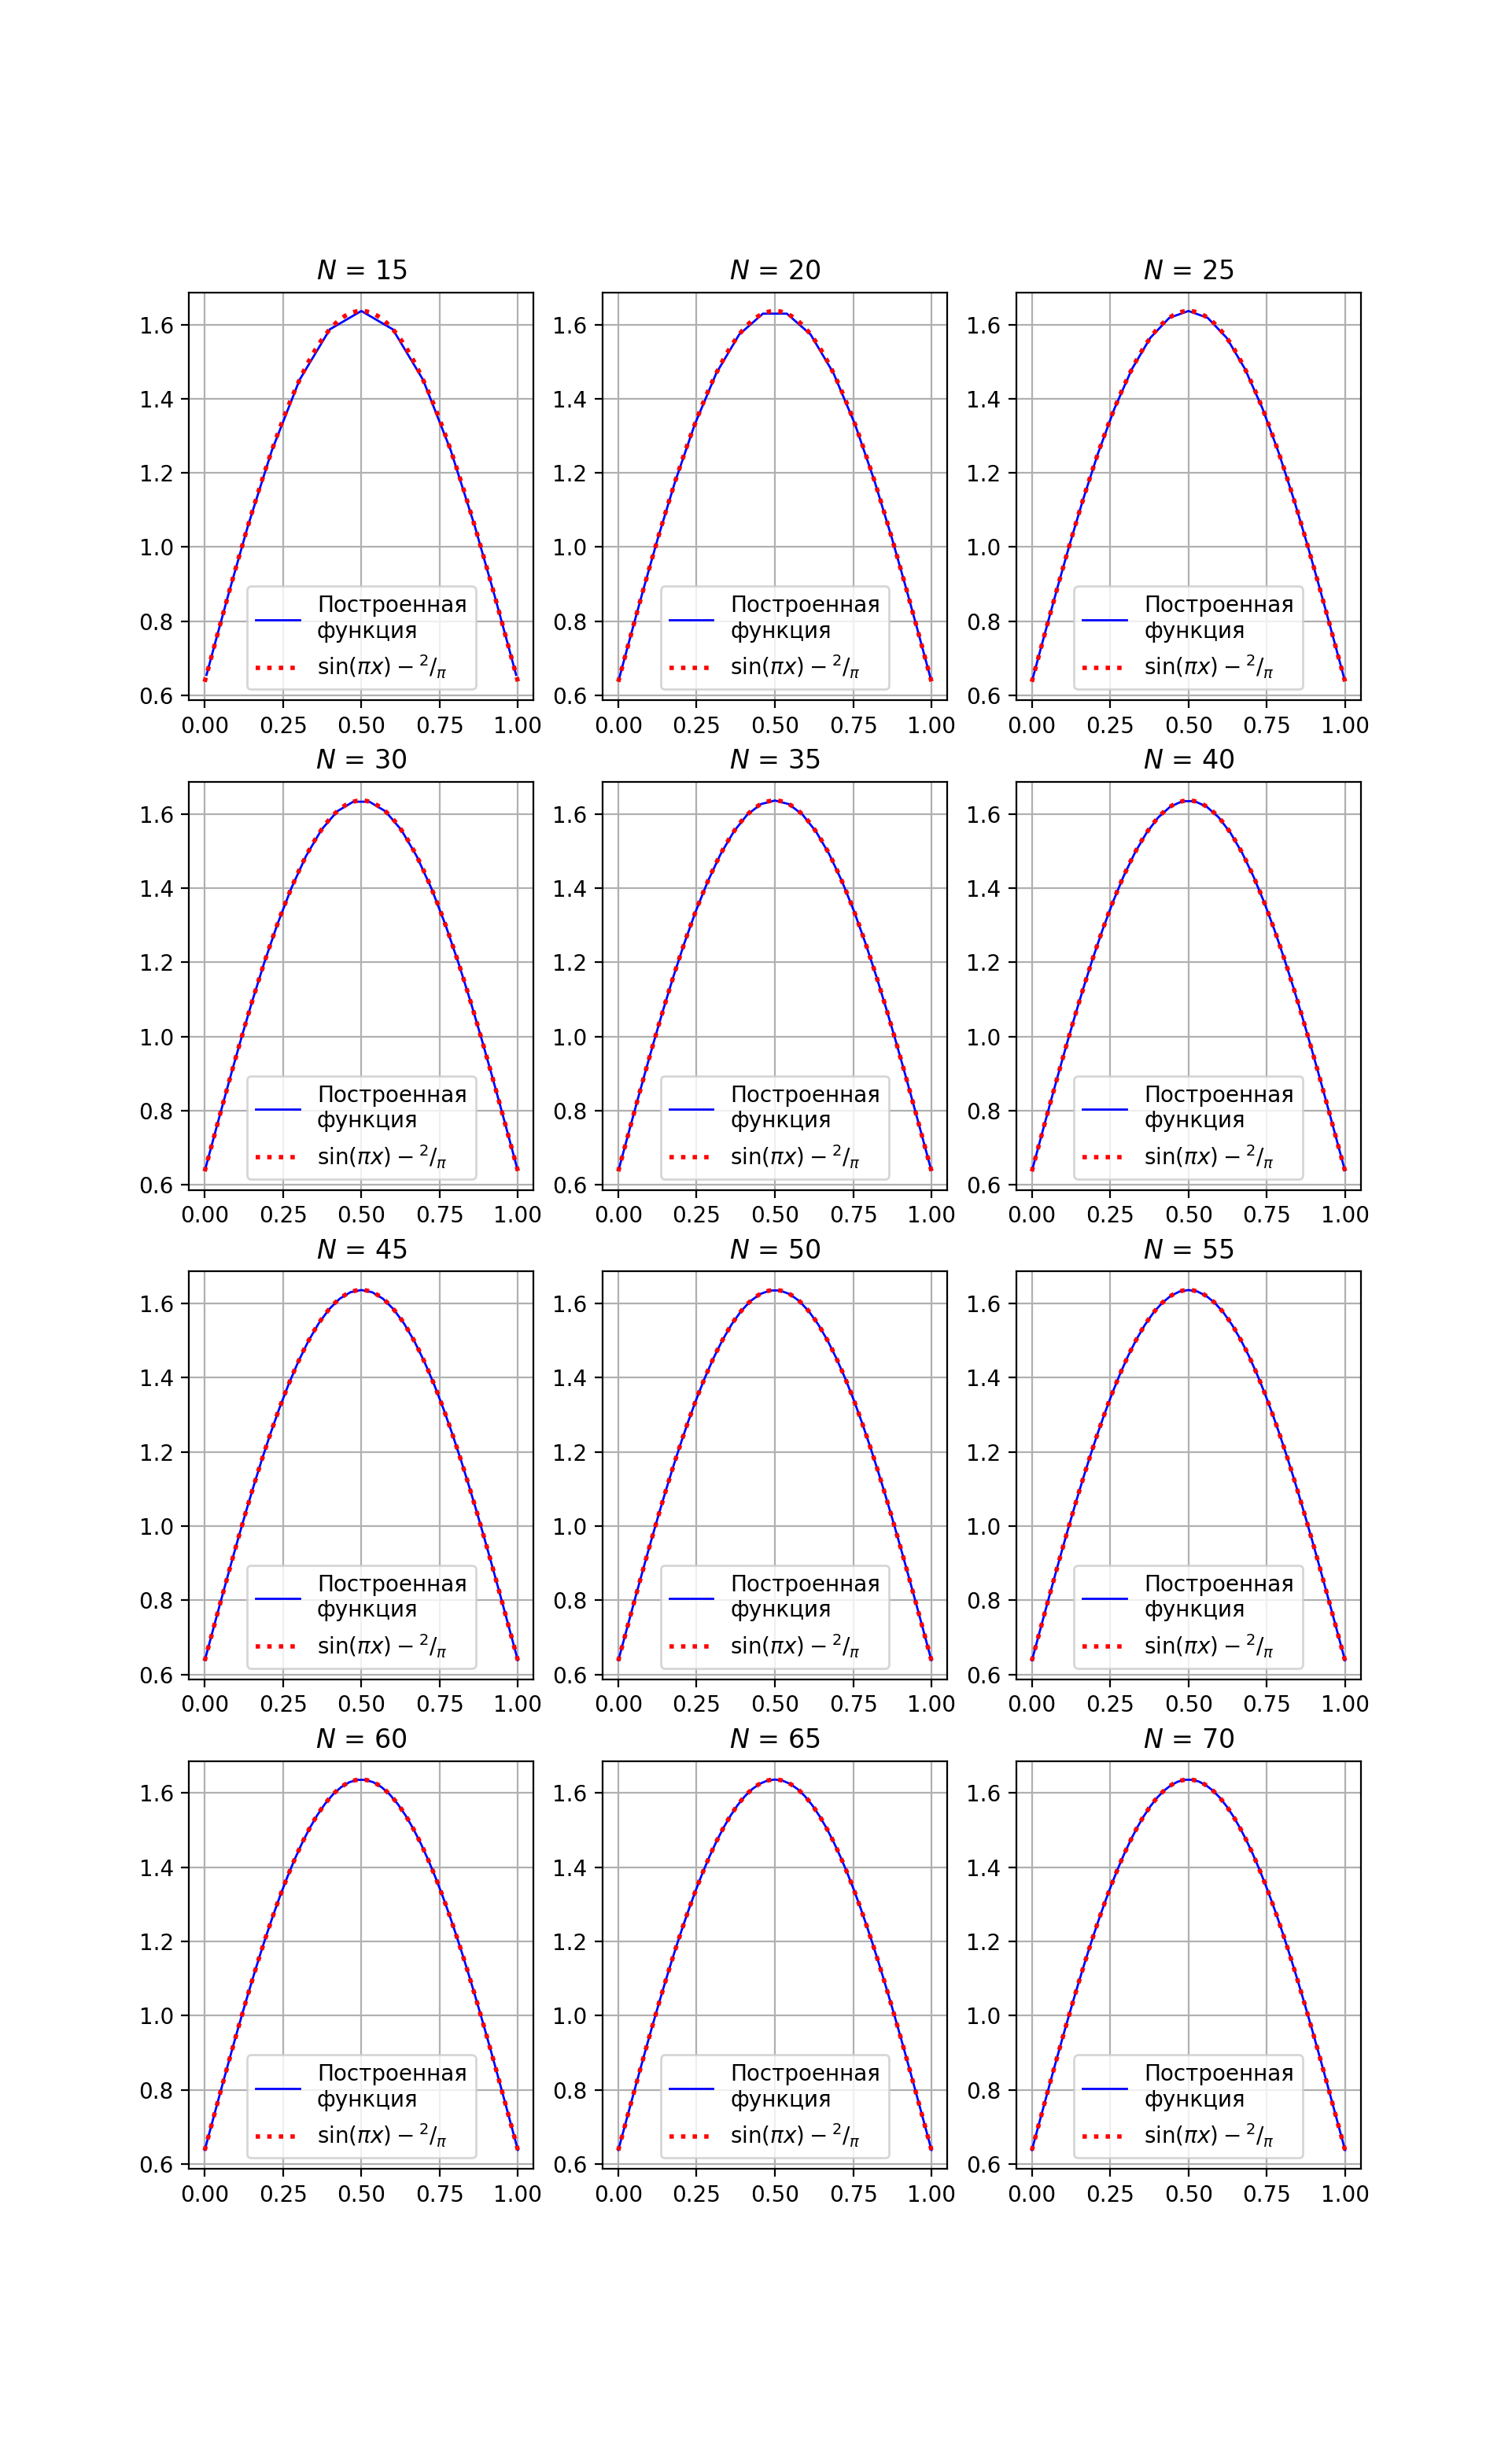

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt


plt.figure()
f_true = lambda x: np.sin(np.pi * x) + 2 / np.pi
x1 = np.linspace(0, 1, 300)
for n in range(15, 71, 5):
    x, f = build_func(n)
    plt.subplot(4, 3, (n-15)/5+1)
    plt.plot(x, f, 'b-', lw=1, label='Построенная\nфункция')
    plt.plot(x1, f_true(x1), 'r:', lw=2, label='$\sin(\pi x) - ^2 /_ \pi$')
    plt.legend()
    plt.grid()
    plt.title('$N$ = {}'.format(n))

Видно, что при $N \geq 45$ график построенной функции достаточно сильно похож на точное решение уравнения

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

<IPython.core.display.Javascript object>


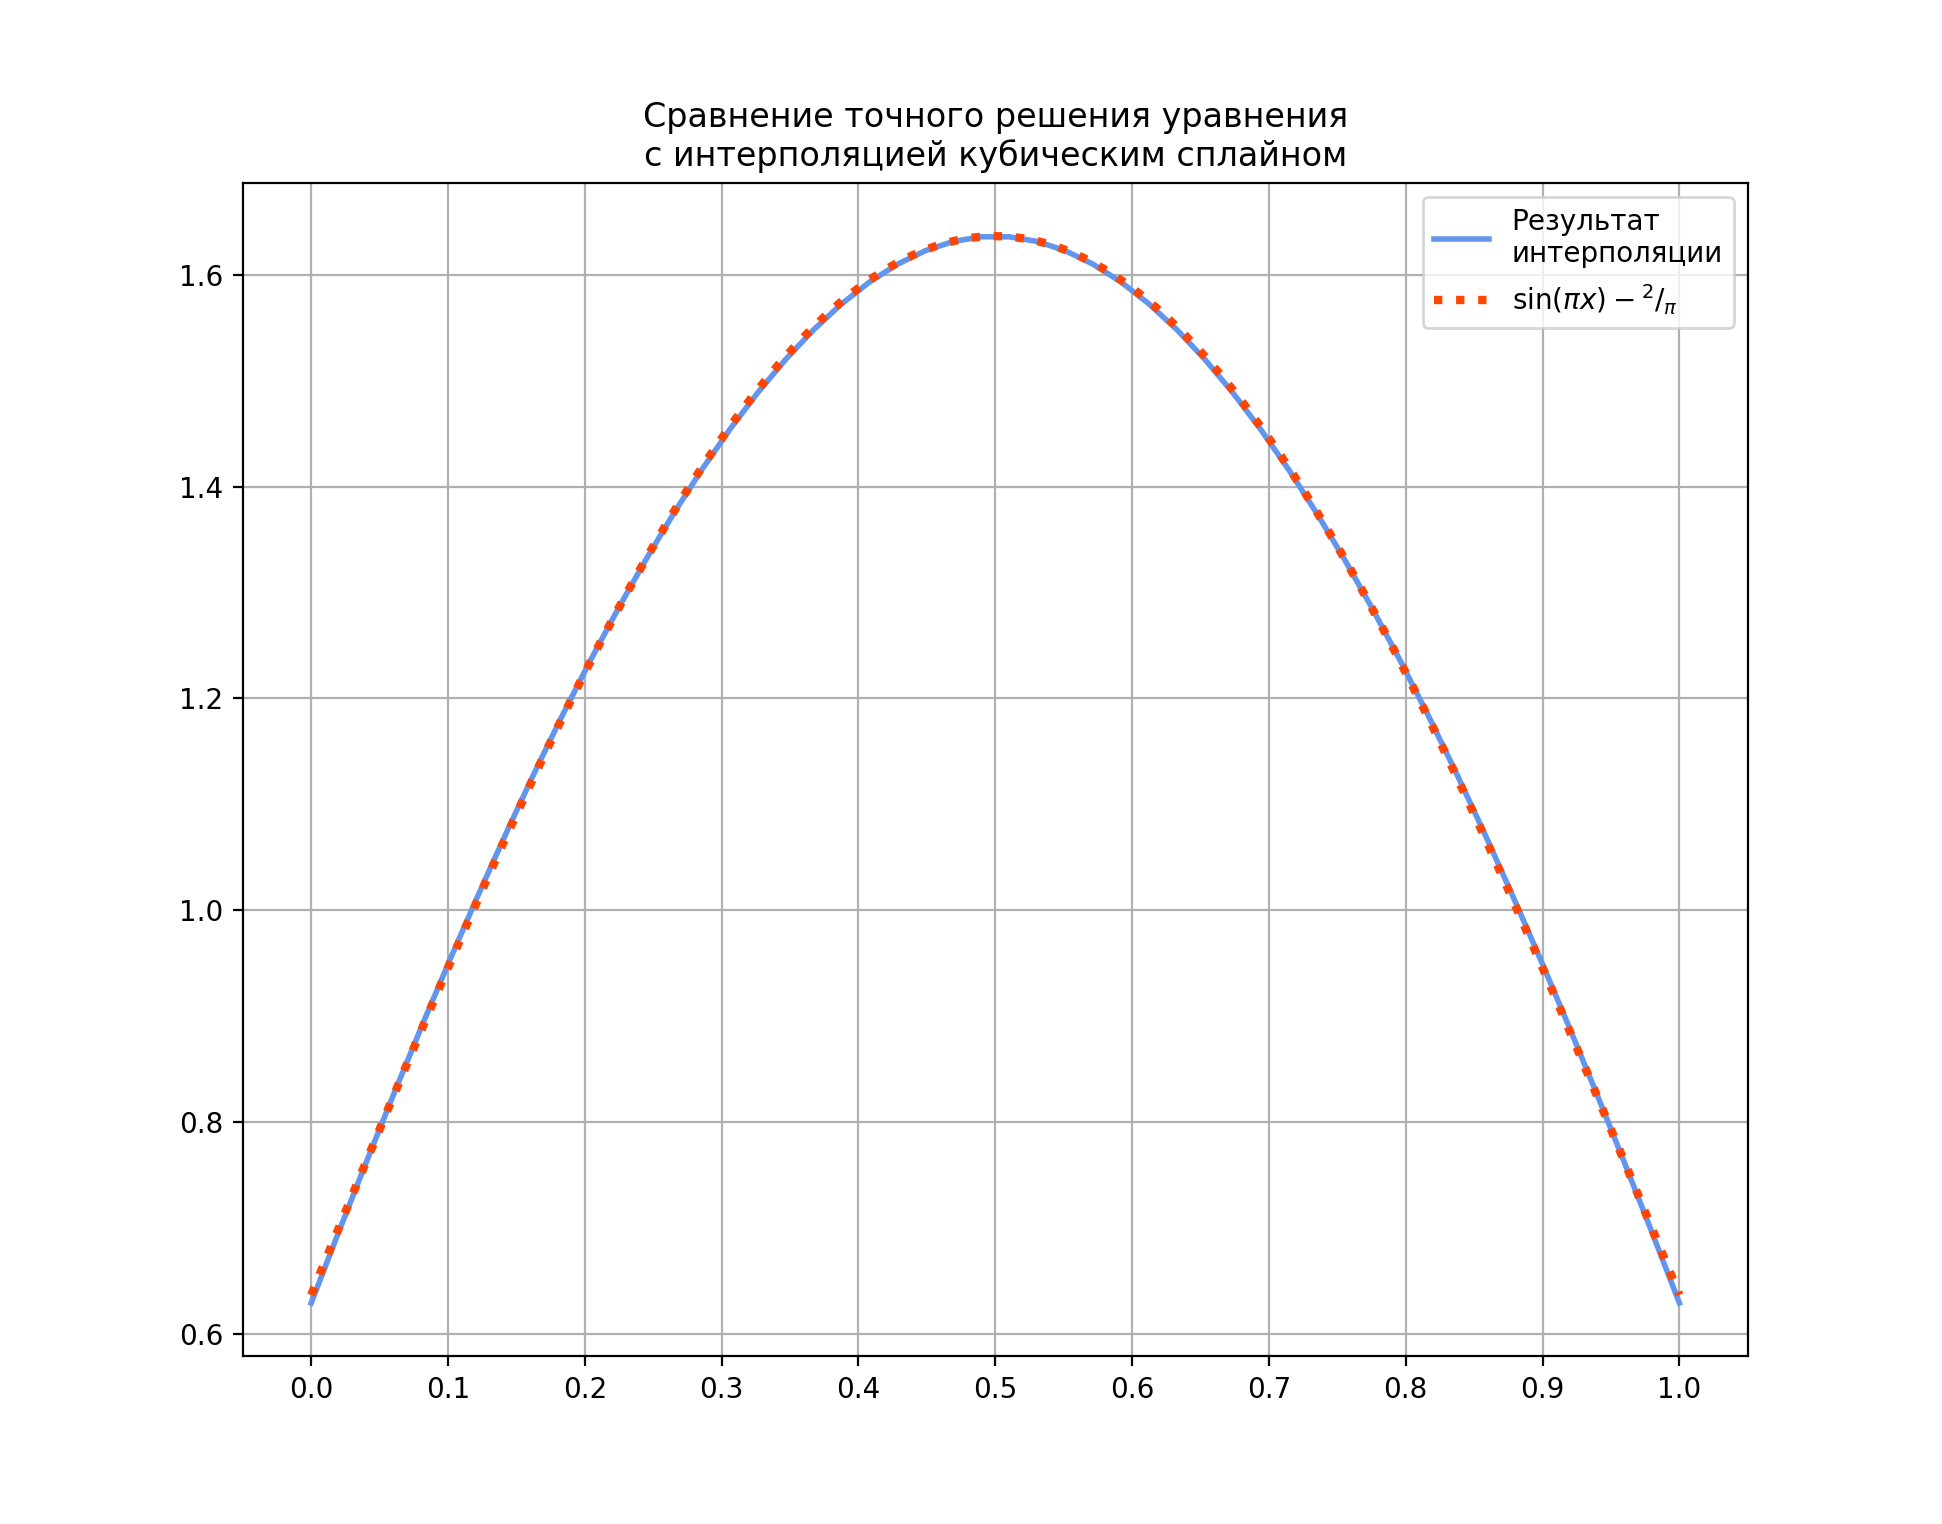

In [7]:
from scipy.interpolate import CubicSpline


# Функция будет строиться на 5 точках
n = 5
f = CubicSpline(*build_func(n))
x2 = np.linspace(0, 1, 50)


plt.figure()
plt.plot(x2, f(x2), '-', lw=2, c='cornflowerblue', label='Результат\nинтерполяции')
plt.plot(x1, f_true(x1), ':', lw=3, c='orangered', label='$\sin(\pi x) - ^2 /_ \pi$')
plt.title('Сравнение точного решения уравнения\nс интерполяцией кубическим сплайном')
plt.xticks(np.arange(11) / 10)
plt.grid()
plt.legend()

Можно заметить, что функция, получившаяся после обычной интерполяции, не очень точно приближает правильное решение 


Понятно, что для корней можно просто взять полином более высокой степени, и тогда интерполяция даст результат лучше, но, однако, уже можно сказать, что при небольших $N$ вычисления дают ошибку, которую можно увидеть по графику

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

В нашем случае формула переходит в:
$$
f(x) = \sin(\pi x) + \frac{1}{2} \sum_j^N w_j\, f_j = \sin(\pi x) + Const
$$

<IPython.core.display.Javascript object>


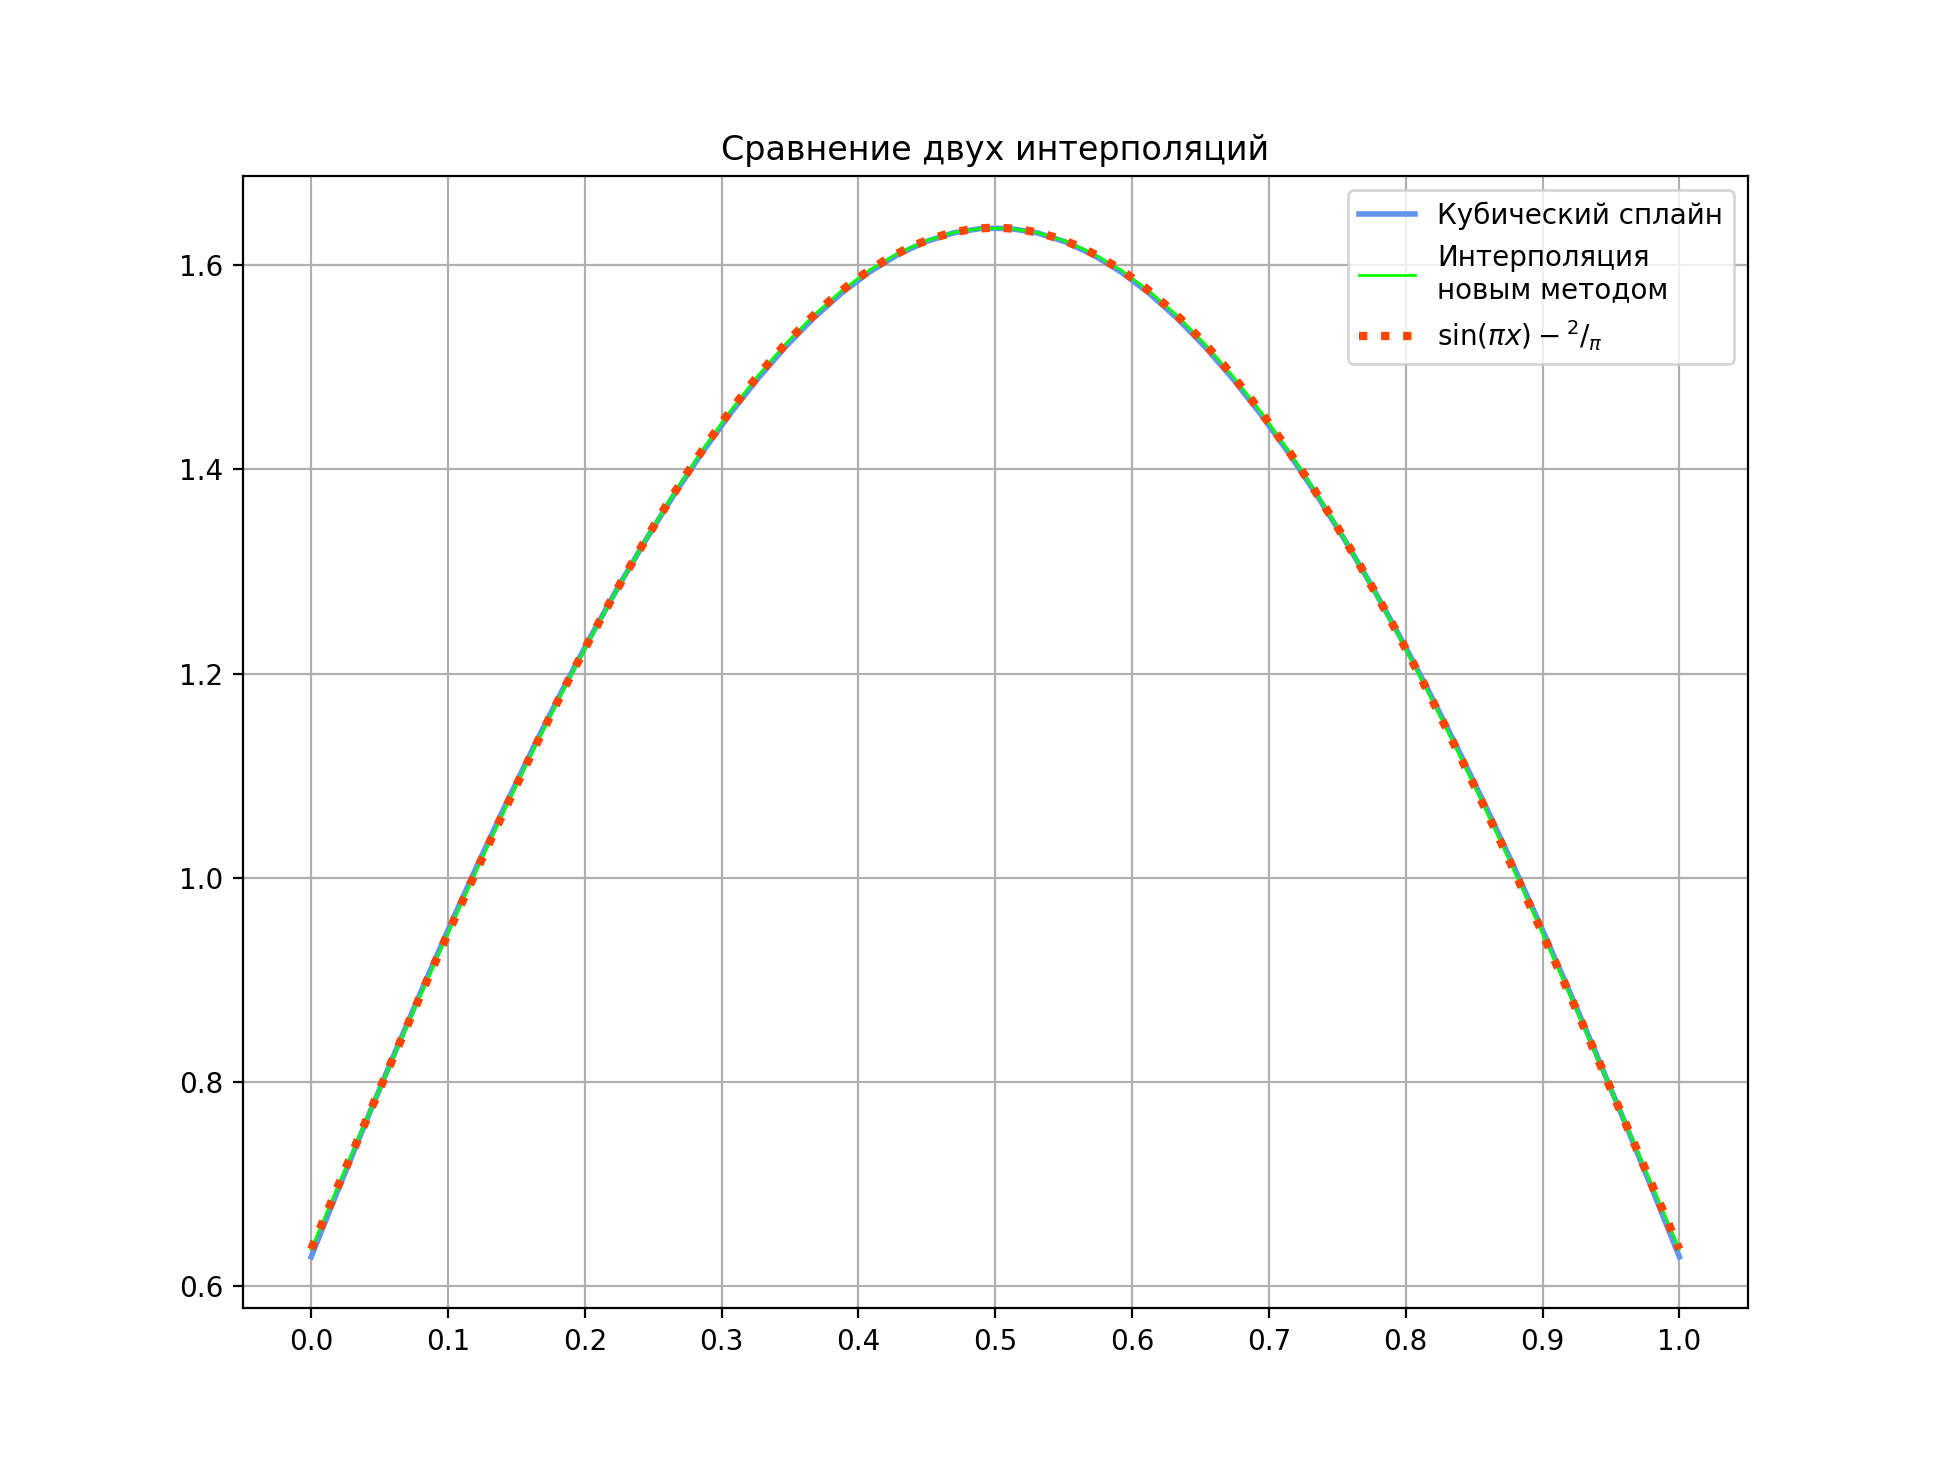

In [8]:
_, wj = roots_sh_legendre(n)
_, fj = build_func(n)
c = 0.5 * sum(wj * fj)
f_improved = lambda x: np.sin(np.pi * x) + c

plt.figure()
plt.plot(x2, f(x2), '-', lw=2, c='cornflowerblue', label='Кубический сплайн')
plt.plot(x2, f_improved(x2), '-', lw=1, c='lime', label='Интерполяция\nновым методом')
plt.plot(x1, f_true(x1), ':', lw=3, c='orangered', label='$\sin(\pi x) - ^2 /_ \pi$')
plt.xticks(np.arange(11) / 10)
plt.grid()
plt.title('Сравнение двух интерполяций')
plt.legend()

Получили, что даже при небольшом $N$ интерполяция новым методом даёт ответ с очень большой точностью. Это можно объяснить тем, что в нашей задаче интерполяция сводится к вычислению константы, равной интегралу от искомой функции. А так как в прошлом пункте мы уже убедились, что интегралы с помощью Гауссовых квадратур вычисляются с ооочень большой точностью даже при небольшом количестве узлов, то и следовало ожидать, что данный метод даст ответ гораздо лучше стандартной интерполяции